In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [19]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,2,46,41000,1
396,15706071,1,51,23000,1
397,15654296,2,50,20000,1
398,15755018,1,36,33000,0


In [4]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2})

**Splitting the dataset into the Training set and Test set**

In [5]:
x=df.iloc[:,1:3]
y=df['Purchased']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

**Predicting the Test set results**

In [12]:
y_pred=rf.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

**Making the Confusion Matrix**

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[63, 11],
       [20, 26]])

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        74
           1       0.70      0.57      0.63        46

    accuracy                           0.74       120
   macro avg       0.73      0.71      0.71       120
weighted avg       0.74      0.74      0.74       120



In [16]:
accuracy_score(y_test,y_pred)

0.7416666666666667

**Visualising the Training set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


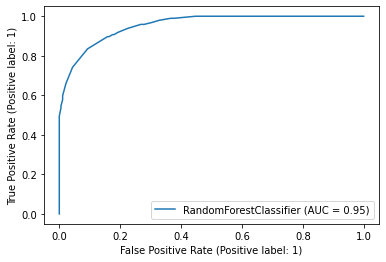

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
plot_roc_curve(rf, x_train, y_train)

**Visualising the Test set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


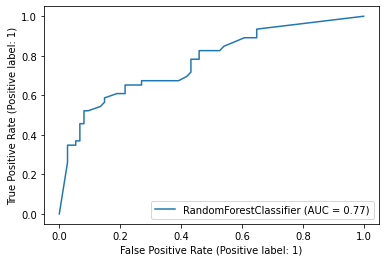

In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
plot_roc_curve(rf, x_test, y_test)